# df.apply() with lambda

## The purpose of this notebook is to do a quick overview of how to use a lambda function with df.apply().

In [ ]:
# some modules we will need
import pandas as pd
import numpy as np

### As we just saw, using the apply() function:

`apply()` is used to apply a function to a data frame or to a series (column of the data frame).

The basic way to use the function is:

out = `dataframe`.apply(`func`)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

#### Notice that apply() takes a FUNCTION as its argument.

Up to this point, we have looked at built in functions (mean, sum, for example) with apply().

lambda functions are functions, so we can also use them with apply().

Let's do a quick review of lambda functions.

See the visual.

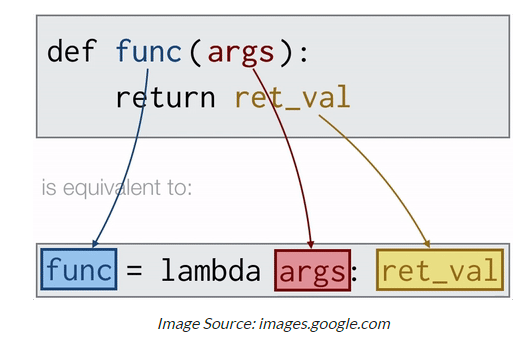

As the picture shows:

1. The overall value/function is what the lambda function returns.

2. The arguments in the lambda function are what is passed in, to the left of the colon (:).

3. The ret_val is what the lambda function returns. It is the operation(s) that are being performed.

Documentation link:  https://docs.python.org/3/reference/expressions.html#lambda

Good link with examples:  https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/

**For final review, let's look at a few simple examples of lambda.**

In [ ]:
# Add 10 to argument a, and return the result:
x = lambda a : a + 10
x(5)

In [ ]:
# pass in multiple arguments
x = lambda a, b, c : a + b + c
x(5, 8, 7)

Remember also, that we can use a lambda function as an anonymous function inside another function.

In [ ]:
def lambdafunc(n):
    return lambda a : a * n

double_value = lambdafunc(2)

# these two are equivalent
double_value(25)
# lambdafunc(2)(25)

### Now let's use apply() and lambda together.

Remember that the default way of apply( ) in dealing with a dataframe is to take a whole column each time and operate on that column with the function passed. So the parameter `axis=0` is the default and DOES NOT need to be specified, if operating on columns.

We can change this default setting by specifying the `axis` parameter, so that `axis=0` (the default) applies by column and `axis=1` applies by row.

In [ ]:
# create a dataframe to operate on
# creating and initializing a nested list
values_list = [[15, 2.5, 100], [20, 3.5, 90], [25, 4.5, 80],
               [30, 5.5, 70], [35, 6.5, 60], [40, 7.5, 50],
               [45, 8.5, 40]]
 
# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Col_1', 'Col_2', 'Col_3'],
                  index=['row_a', 'row_b', 'row_c', 'row_d', 'row_e', 'row_f', 'row_g'])

df

In [ ]:
# Apply function numpy.square() to square the values of every value in the df
df_sq = df.apply(lambda x: np.square(x))
df_sq

In [ ]:
# Apply function numpy.square() to square the values of an individual row
# We are using axis=1 to apply to rows
df_sq2 = df.apply(lambda x: np.square(x) if x.name == 'row_c' else x, axis=1)

df_sq2

In [ ]:
# Apply function numpy.square() to square the values of a selection of rows
# We are using axis=1 to apply to rows
df_sq3 = df.apply(lambda x: np.square(x) if x.name in ['row_a', 'row_d', 'row_f'] else x, axis=1)

df_sq3

In [ ]:
# Applying lambda function on a column
# Note that axis=0 is the default, to apply to columns.
# So the two statements below function the same
df_sq4 = df.apply(lambda x: np.square(x) if x.name in ['Col_2'] else x)  
# df_sq4 = df.apply(lambda x: np.square(x) if x.name in ['Col_2'] else x, axis=0)

df_sq4

In [ ]:
# Create a new column in the original dataframe
# Operating on the column 'Col_1', so no need to include axis=0
display(df)
df['status'] = df['Col_1'].apply(lambda x: 'Low' if x < 35 else 'High')

df

**The function that lambda calls can also be user-defined.**

In [ ]:
# create a function that adds two columns
# Note that in the function definition, we are passing in
# a single object that is expecting to have two values, 
# addressable by their index number (list-like)
def add_two_columns(x):    
    return x[0] + x[1]  

# create a new column that is the result of adding the values of two columns together
# We are passing in a list of the two columns to add
df['Col_4'] = df.apply(lambda x: add_two_columns([x['Col_1'], x['Col_2']]), axis=1)

df

In [ ]:
# create a function that adds two columns
# Note that in the function definition, we are passing in
# two objects and adding them directly
def add_two_columns_v2(x,y):    
    return x + y  

# create a new column that is the result of adding the values of two columns together
# We are passing in the two column names individually
df['Col_5'] = df.apply(lambda x: add_two_columns_v2(x['Col_1'], x['Col_2']), axis=1)

df

### What are your questions on using lambda functions with df.apply()?